Description
Objective
– Statistical Analysis of Business Data. Explore the dataset and extract insights fromthe data. The idea is for you to get comfortable with doing statistical analysis in Python.
You are expected to do the following:
1.
Explore the dataset and extract insights using Exploratory Data Analysis.
2.
Prove (or disprove) that the medical claims made by the people who smoke is greater thanthose who don't? [Hint- Formulate a hypothesis and prove/disprove it]
3.
Prove (or disprove) with statistical evidence that the BMI of females is different from thatof males.
4.
Is the proportion of smokers significantly different across different regions? [Hint : Createa contingency table/cross tab, Use the function : stats.chi2_contingency()]
5.
Is the mean BMI of women with no children, one child, and two children the same?Explain your answer with statistical evidence.
*Consider a significance level of 0.05 for all tests.
Context
- Leveraging customer information is of paramount importance for most businesses. Inthe case of an insurance company, attributes of customers like the ones mentioned below canbe crucial in making business decisions. Hence, knowing to explore and generate value out ofsuch data can be an invaluable skill to have.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
# importing all of the libraries that I might need

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('AxisInsurance.csv') # pandas method for reading the csv data into a dataframe (df)

In [4]:
axis = df.copy() # making a copy of the dataset to avoid accidentally modifying the original data

In [5]:
axis.head() # check the top 5 lines to see what the data looks like

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [6]:
axis.tail() # check the last 5 rows 

age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

In [6]:
axis.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

# Three categorical columns and the rest are numerical

In [7]:
axis.shape # check the data number of rows/columns

(1338, 7)

Dataset has 1338 rows and 7 columns

In [7]:
axis.isnull().sum() # checking if there are any null values - There are none found

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
axis.info() # Checking the DataTypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# From above, there are 2 int64, 3 objects, and 2 float64 - To prevent potential issues with manipulating the data, we need to convert "objects" to "Categories"

In [5]:
#Changing the objects to categories in the df
axis["sex"]=axis["sex"].astype("category")
axis["smoker"]=axis["smoker"].astype("category")
axis["region"]=axis["region"].astype("category")

In [6]:
axis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


# Above, we checked the info to confirm changing the datatypes, for Sex smoker and region, from obj to category.. It worked, and also it reduced the memory usage from 73.3 to 46.3 KB

In [12]:
axis.describe() # taking a look at some basic statistics for the data

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

# Notes from describe(): All columns have the same 1338 rows, so no missing rows. 
# Little to no skewness for: age, bmi and children
# Significant Skewness for: charges - right-skewed
# will double check with a histogram

In [7]:
# The above method didn't show the categorical columns, sex smoker and region, so we are looking at that now with 'include'
axis.describe(include=['category']) 

sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364

sex and smoker - both have two uniques variables - male/female and yes/no.  Region has 4 variables
Males are the top customer in the dataset (676 - 50.5% of users)
More non-smokers (1064) than smokers
Most users live in the southeast (364 - 27%) than the other three regions

In [8]:
# defining a function to plot boxplot above a histogram - plus formatting the background, size and colors
def histogram_boxplot(feature, figsize=(15,10), bins=None):
    f2, (ax_box2, ax_hist2, ) = plt.subplots(nrows = 2, # number of rows of the subplot grid
                                          sharex = False, #x-axis will NOT be shared among subplots
                                          gridspec_kw = {"height_ratios": (.25, .75)},
                                          figsize = figsize
                                          ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='navy') # boxplot will be created and a triangle will show the mean
    sns.distplot(feature, kde=False, ax=ax_hist2, bins = bins, color="navy") if bins else sns.distplot(feature, kde=False, color = 'navy')
    ax_hist2.axvline(np.mean(feature), color='blue', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') #Add median to histogram
    ax_box2.set_facecolor("whitesmoke") #adding a background color to boxplot
    ax_hist2.set_facecolor("whitesmoke") #adding a background color to histogram
    
    

In [9]:
#creating a list with only the numerical columns - either int or float
number_columns = ['age', 'bmi', 'children','charges']
number_columns


['age', 'bmi', 'children', 'charges']

In [10]:
# creating a list with only the categorical columns
category_columns = ['sex','smoker','region']
category_columns

['sex', 'smoker', 'region']

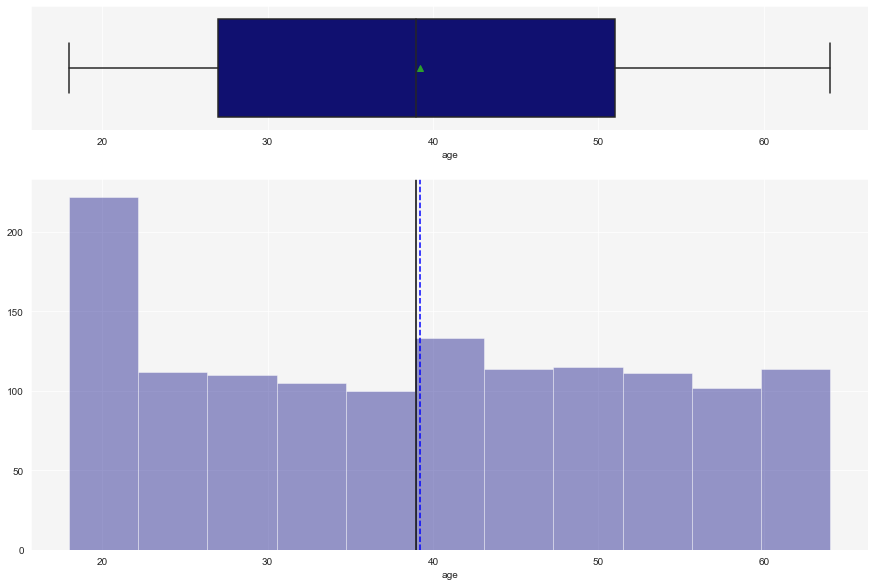

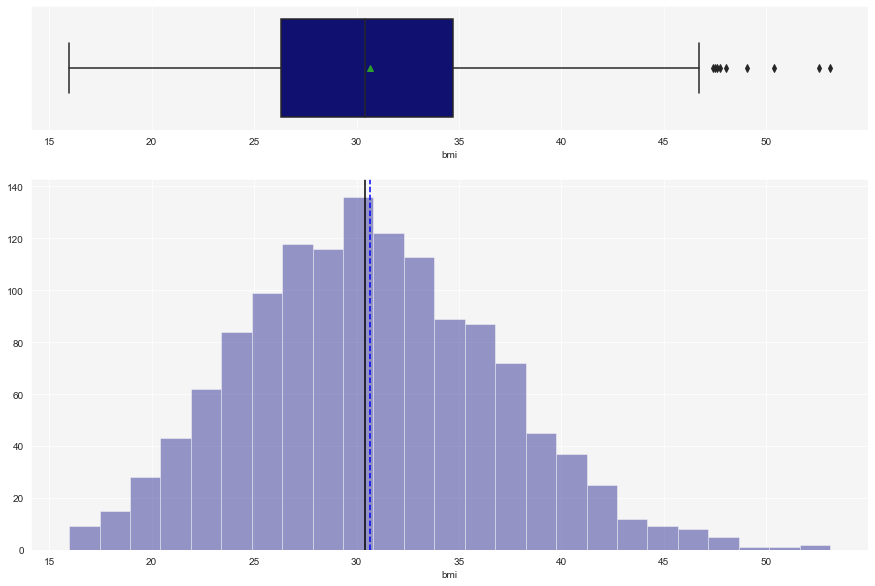

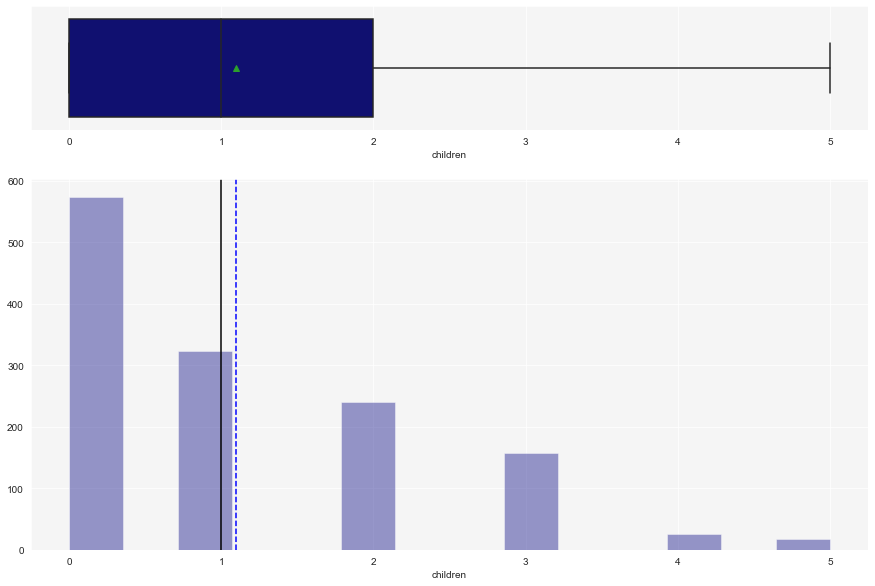

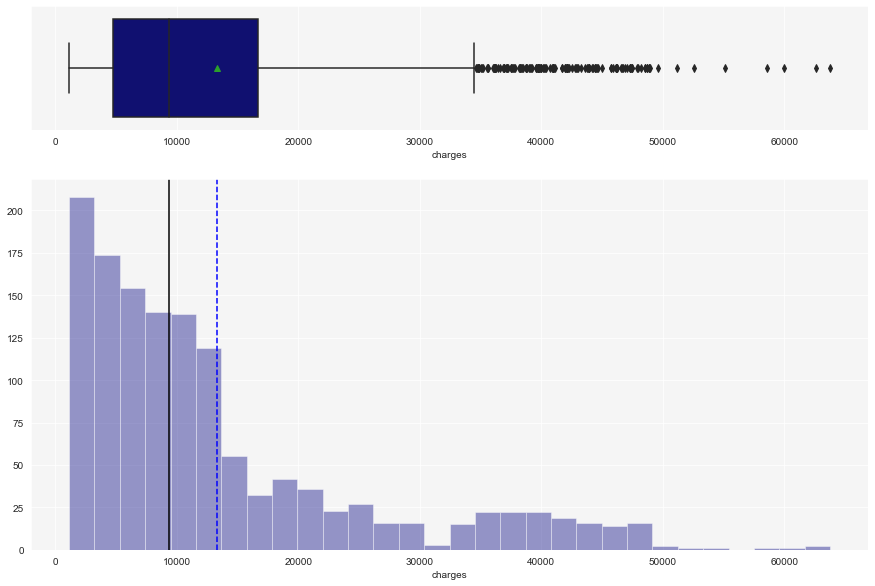

In [24]:
# running a loop through the numerical columns list and plotting the boxplot/distplots 
for each in number_columns:
    plt.show()
    histogram_boxplot(axis[each]) # for each column, run the histogram_boxplot function 

From above the data is skewed to the right. Charges has a large skewness to the right 

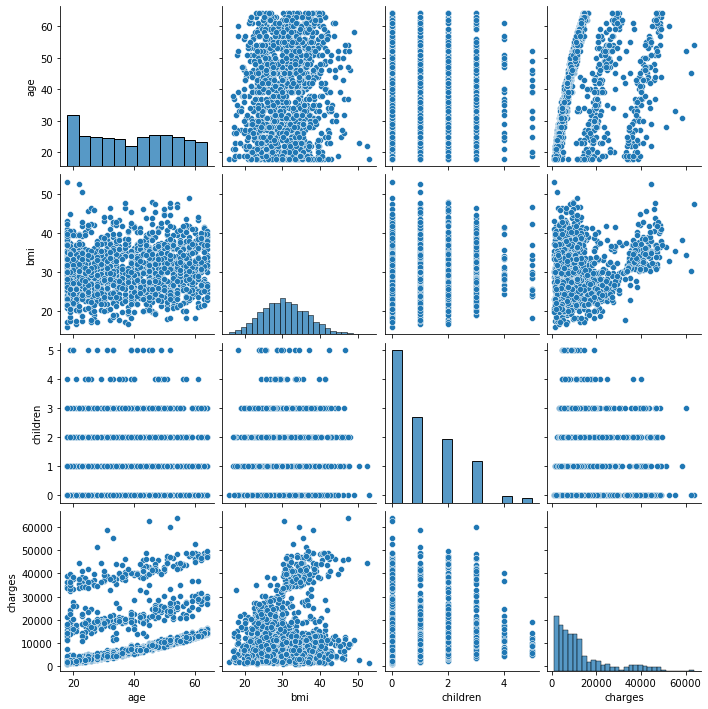

In [41]:
sns.pairplot(axis) # run a pairplot to get an initial look at potential correlations to deep dive into 

From Pairplot Age vs Charges: Medical Charges rise with age - a positive correlation. 
Positive correlations for BMI and charges (some people end up with more medical charges as they put on weight)
Positive correlation for age and BMI (some people tend to put on weight as they get older)

# Univariate Analysis

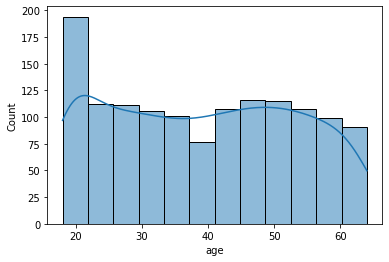

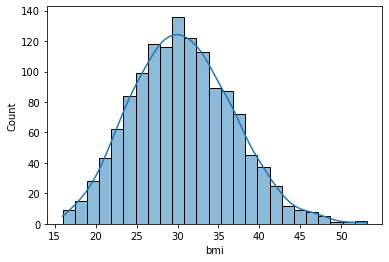

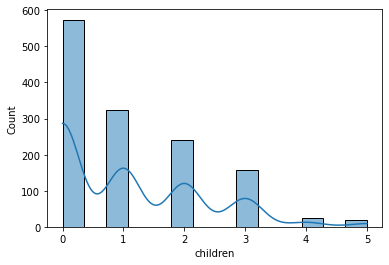

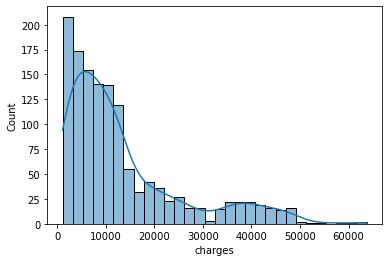

In [12]:
# Running a loop for each Column and getting a corresponding histogram.. looking for trends
# Univariate Analysis
for ea in number_columns:
    plt.figure() #Note, this is to make a new plot each loop (otherwise, all data would show on one plot)
    sns.histplot(axis[ea],kde=True)
    

Notes from histograms above: 
BMI is normal but with a slight right-skewness
Charges are greatly right-skewed

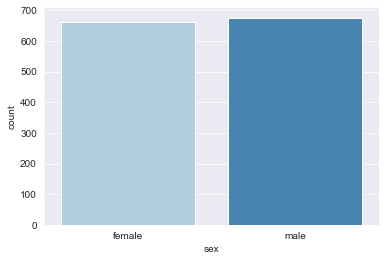

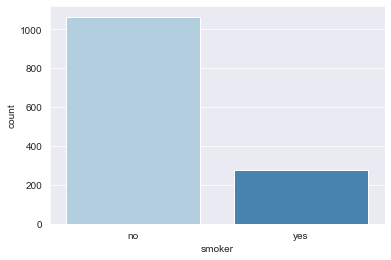

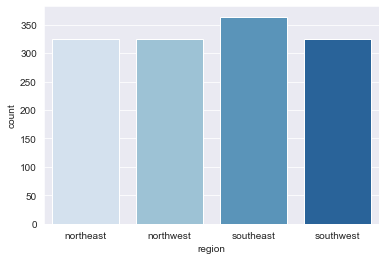

In [18]:
# running a loop through each categorical column and plotting a countplot
for ea in category_columns:
    plt.figure()
    sns.set_style("darkgrid")
    sns.countplot(axis[ea], palette='Blues')
    

<AxesSubplot:xlabel='sex', ylabel='count'>

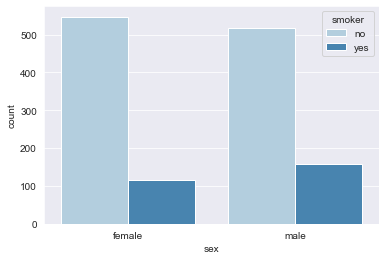

In [20]:
# comparing number of male/female and split between smokers and non-smokers
plt.figure()
sns.set_style("darkgrid")
sns.countplot(axis['sex'], hue=axis['smoker'], palette='Blues')

<AxesSubplot:xlabel='region', ylabel='count'>

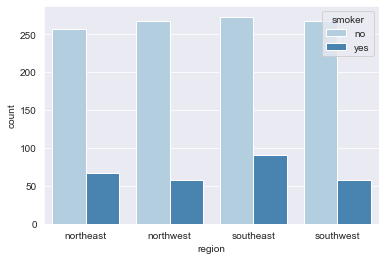

In [25]:
# checking the distribution of customers from the different region and comparing smokers 
# more smokers came from the southeast, but the southeast also produced the most customers overall
plt.figure()
sns.set_style("darkgrid")
sns.countplot(axis['region'], hue=axis['smoker'], palette='Blues')

# Multi-Variate Analysis

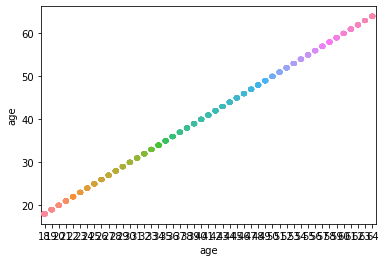

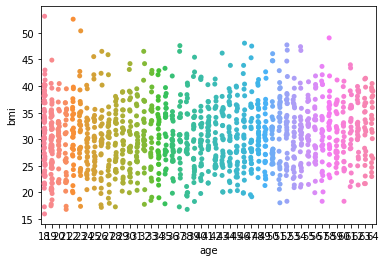

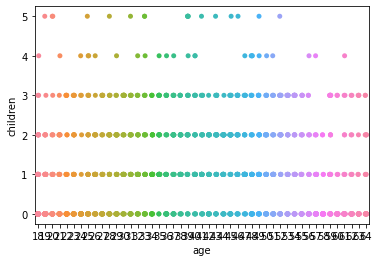

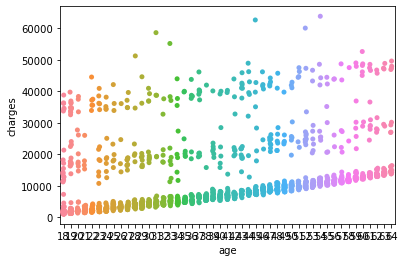

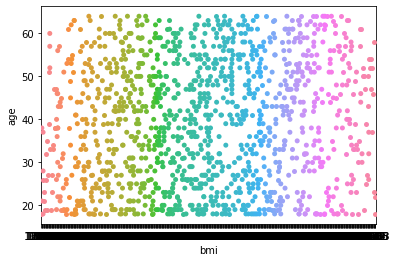

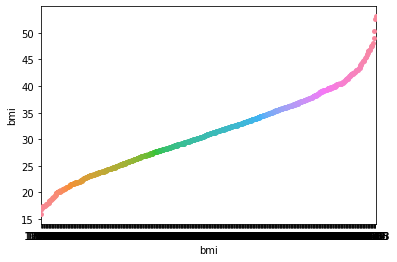

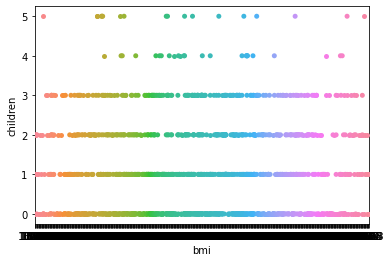

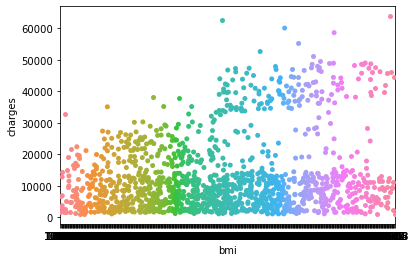

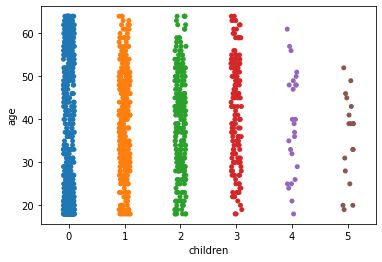

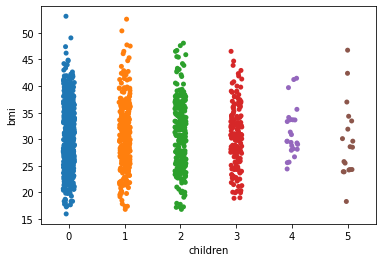

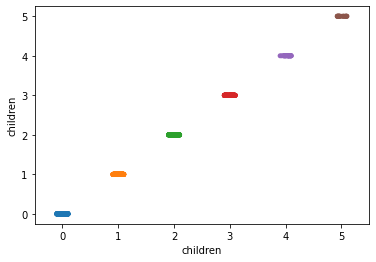

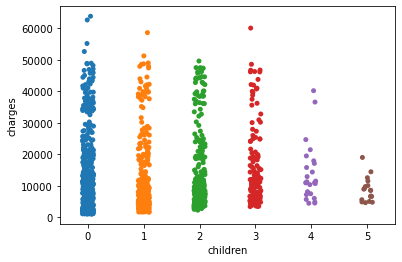

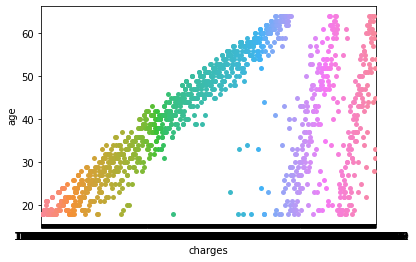

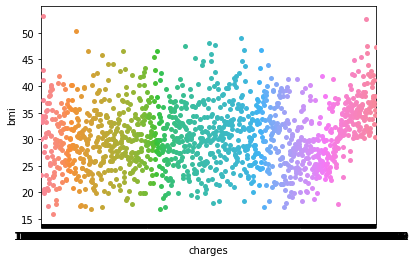

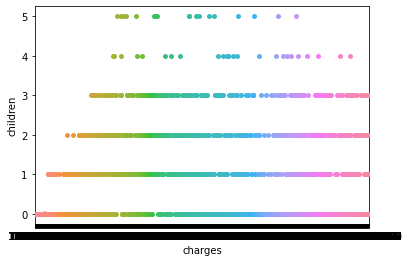

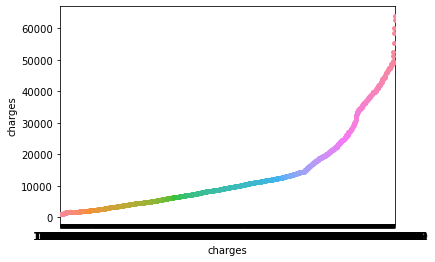

In [13]:
# This loop will allow to run a stripplot 'scatter' for each category combination.. then we can quickly go through
# the plots and pick out the correlations that look noteworthy and require further digging with different types of plots.
for ea in number_columns: # for each column in the dataset
    for each in number_columns: # run through each column again to plot against all the other columns
        plt.figure() # create a new plot each loop
        sns.stripplot(axis[ea],axis[each],jitter=True)

<AxesSubplot:>

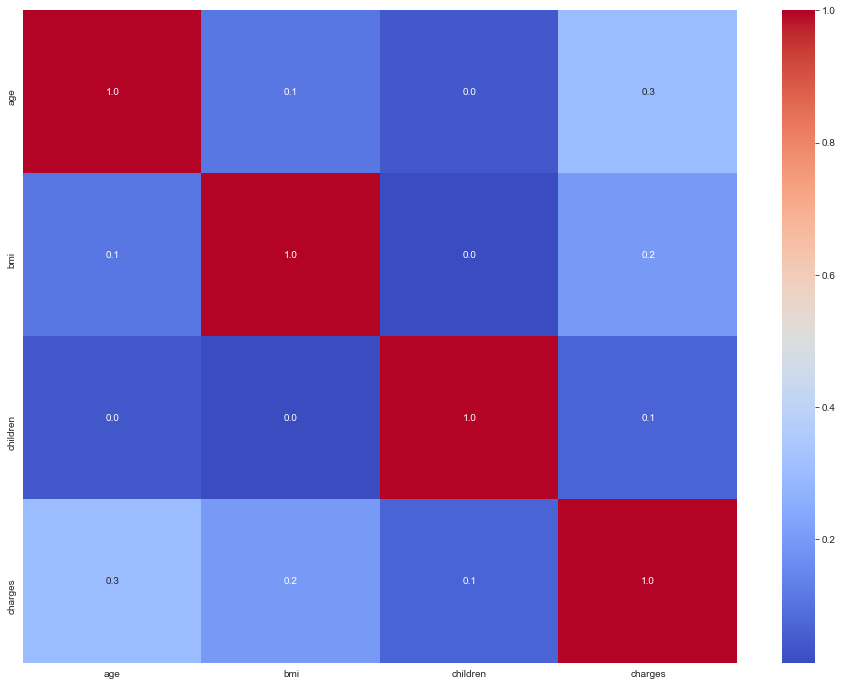

In [28]:
corr = axis[number_columns].corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True, cmap='coolwarm',
            fmt='.1f',
            xticklabels=corr.columns,
            yticklabels=corr.columns)

There are positive correlations between age/charges and bmi/charges but they are minor.. 0.7+ indicates a strong correlation

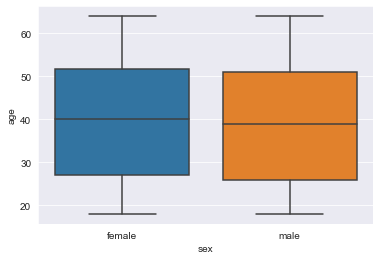

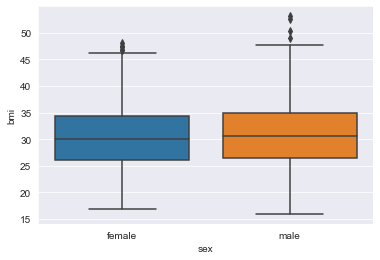

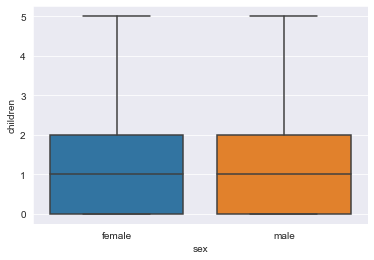

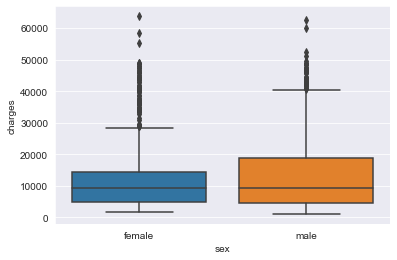

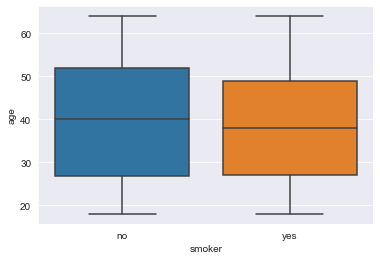

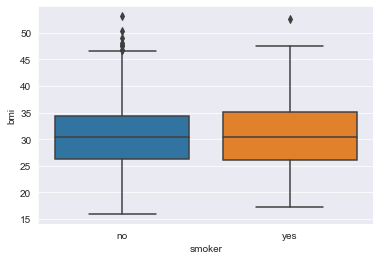

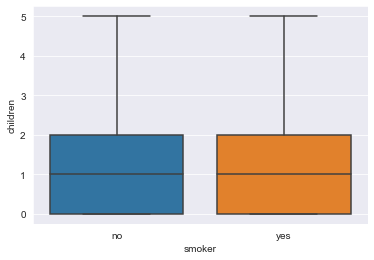

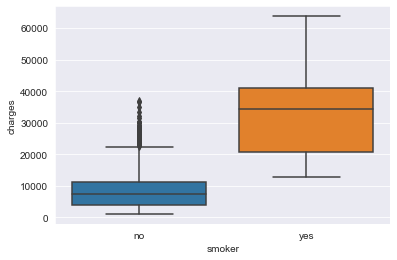

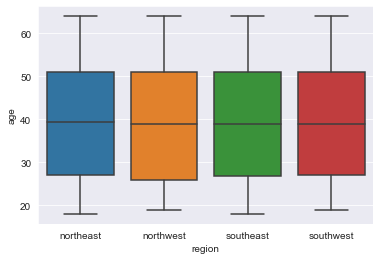

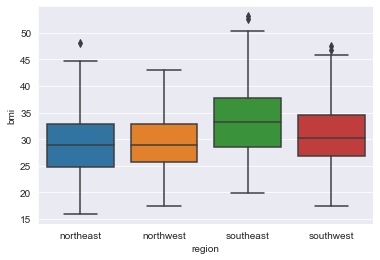

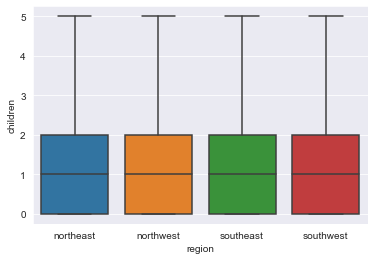

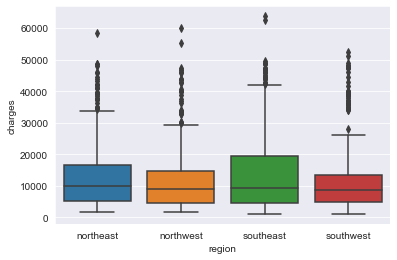

In [30]:
# from the pairplots, I made several observations that need further analysis.. Product vs Age boxplot here:
for each in category_columns:
    for ea in number_columns:
        plt.figure()
        sns.boxplot(axis[each],axis[ea])

Males are slightly higher in regards to BMI vs women - will do a t-test to confirm
Males experience more charges vs. women
As people get older, they are less smokers in the dataset
Smokers have slightly higher BMI than non-smokers
# Smokers have much more charges than non-smokers - will still do a t-test to confirm
People in the Southeast have higher BMI values than the others, with Southwest being a close second
People in the Southeast have more charges than other regions
# Will do additional testing to confirm/reject whether they differ region to region


In [17]:
axis.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

<AxesSubplot:xlabel='smoker', ylabel='charges'>

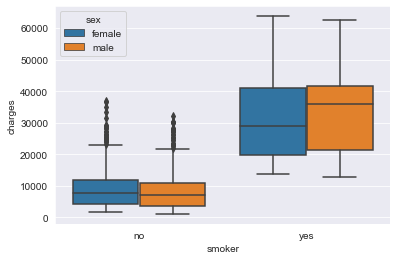

In [27]:
sns.set_style("darkgrid")
sns.boxplot(axis['smoker'], axis['charges'], hue=axis['sex'])

# Much higher Medical Charges for Smokers vs Non-Smokers 

In [11]:
# This is to create bins for the BMI Series - effectively turning it into a category for every 5 BMI point range
bmi_labels = ['15-20', '21-25','26-30', '31-35','36-40', '41-45', '50+' ] # labels for each range
cut_bins = [15, 20, 25, 30, 35, 40, 45, 50] # the actual ranges/bins for each value in the BMI column
axis['bmi_ranges'] = pd.cut(axis['bmi'], bins = cut_bins, labels=bmi_labels) # creates a new Column with the BMI labels

<AxesSubplot:xlabel='bmi_ranges', ylabel='charges'>

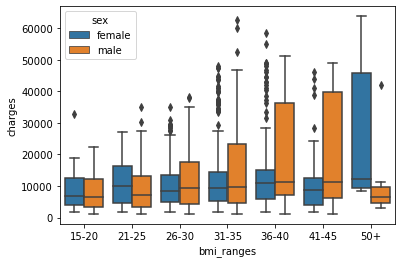

In [48]:
# boxplot for the new bmi-ranges bins vs Charges with a sex hue
sns.boxplot(axis['bmi_ranges'], axis['charges'], hue=axis['sex'])

<AxesSubplot:xlabel='bmi_ranges', ylabel='charges'>

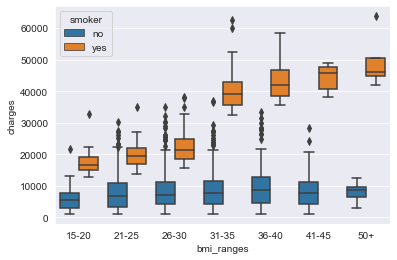

In [28]:
# boxplot for the new bmi-ranges bins vs Charges with a smoker hue
sns.set_style("darkgrid")
sns.boxplot(axis['bmi_ranges'], axis['charges'], hue=axis['smoker']) # Now plot the new BMI bin ranges vs Charges and hue=Smoker

<AxesSubplot:xlabel='bmi_ranges', ylabel='age'>

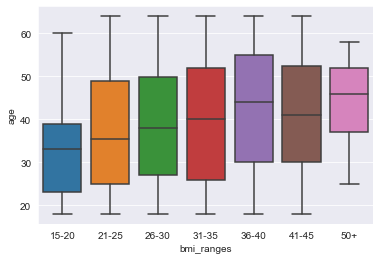

In [15]:
# boxplot for the new bmi-ranges bins vs Age with a smoker hue
sns.set_style("darkgrid")
sns.boxplot( axis['bmi_ranges'],axis['age'])#, hue=axis['smoker']) # Now plot the new BMI bin ranges vs Charges and hue=Smoker

<AxesSubplot:xlabel='bmi_ranges', ylabel='age'>

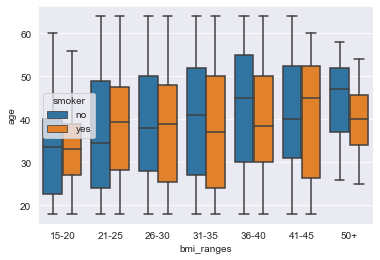

In [35]:
# boxplot for the new bmi-ranges bins vs Age with a smoker hue
sns.set_style("darkgrid")
sns.boxplot( axis['bmi_ranges'],axis['age'], hue=axis['smoker']) # Now plot the new BMI bin ranges vs Charges and hue=Smoker

# Median age trends up with BMI Ranges - People put on weight as they age

<AxesSubplot:xlabel='bmi_ranges', ylabel='count'>

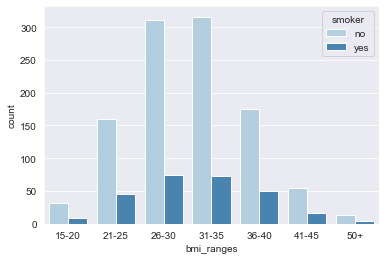

In [26]:
# taking the new bins for bmi-ranges, and re-running a countplot to see if the distribution looks normal for both smokers and non-smokers
plt.figure()
sns.set_style("darkgrid")
sns.countplot(axis['bmi_ranges'], hue=axis['smoker'], palette='Blues')

# Strong Correlation between Increased medical charges for Smokers 
# Also a big jump once BMI reaches above 30 and then jumps again every 5 BMI points after that 
# Charges remain relatively low for the non-smokers, but do increase positively once above 20 BMI 

<AxesSubplot:xlabel='region', ylabel='charges'>

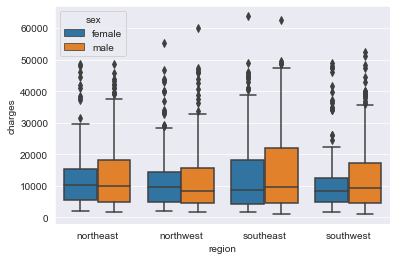

In [27]:
sns.set_style("darkgrid")
sns.boxplot(axis['region'], axis['charges'], hue=axis['sex'])

<AxesSubplot:xlabel='region', ylabel='charges'>

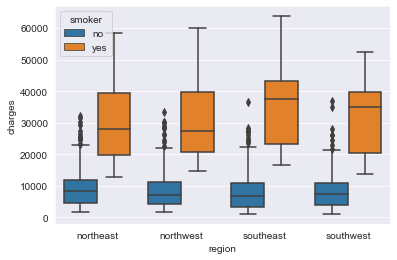

In [28]:
sns.set_style("darkgrid")
sns.boxplot(axis['region'], axis['charges'], hue=axis['smoker'])

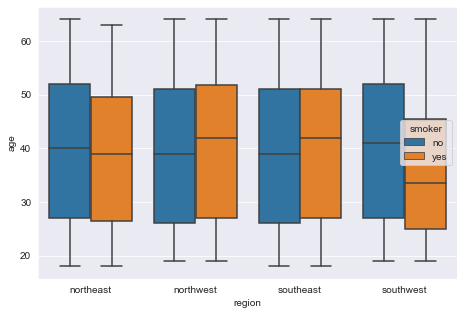

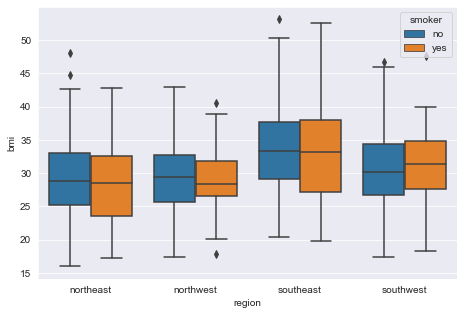

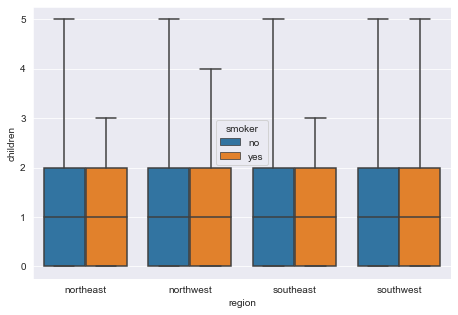

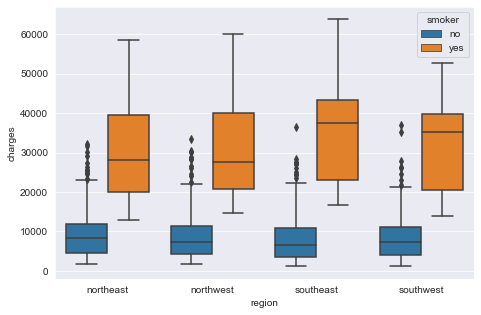

In [28]:
for ea in number_columns:
    plt.figure(figsize=(7.5,5))
    sns.set_style("darkgrid")
    sns.boxplot(axis['region'], axis[ea], hue=axis['smoker'])

<AxesSubplot:xlabel='age'>

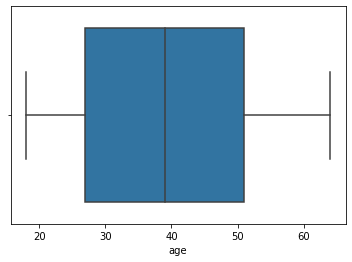

In [15]:
sns.boxplot(axis['age'])

In [12]:
# This is to create bins for the Age Series - effectively turning it into a category for every 5 BMI point range
age_labels = ['18-20', '21-25','26-30', '31-35','36-40', '41-45', '50+' ] # labels for each range
age_bins = [17, 20, 25, 30, 35, 40, 45, 50] # the actual ranges/bins for each value in the Age column
axis['age_ranges'] = pd.cut(axis['age'], bins = age_bins, labels=age_labels) # creates a new Column with the Age_Ranges labels

In [15]:
axis.head()

age     sex     bmi  children smoker     region      charges bmi_ranges  \
0   19  female  27.900         0    yes  southwest  16884.92400      26-30   
1   18    male  33.770         1     no  southeast   1725.55230      31-35   
2   28    male  33.000         3     no  southeast   4449.46200      31-35   
3   33    male  22.705         0     no  northwest  21984.47061      21-25   
4   32    male  28.880         0     no  northwest   3866.85520      26-30   

  age_ranges  
0      18-20  
1      18-20  
2      26-30  
3      31-35  
4      31-35

<AxesSubplot:xlabel='age_ranges', ylabel='charges'>

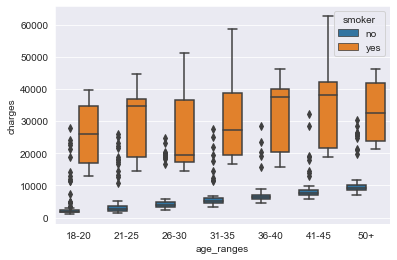

In [20]:
# boxplot for the new age-ranges bins vs Charges with a smoker hue
sns.set_style("darkgrid")
sns.boxplot(axis['age_ranges'], axis['charges'], hue=axis['smoker']) # Now plot the new Age bin ranges vs Charges and hue=Smoker

# We see much higher charges for the smokers 
# Charges do increase with age for both smokers and non-smokers
# However non-smokers greatly reduced correlation with lower charges
# Interesting - 25 and under smokers have higher charges spread than 50+ non-smokers 

<AxesSubplot:xlabel='age_ranges', ylabel='charges'>

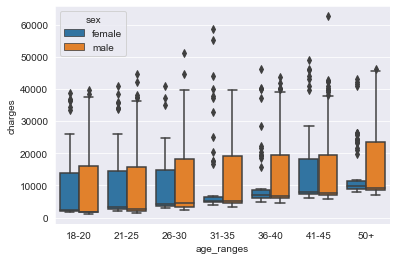

In [21]:
# boxplot for the new age-ranges bins vs Charges with a sex hue
sns.set_style("darkgrid")
sns.boxplot(axis['age_ranges'], axis['charges'], hue=axis['sex']) # Now plot the new Age bin ranges vs Charges and hue=Smoker

# We see higher charges for males, but the previous boxplot 'charges vs age_range / smoker hue' shows much more insight into what is correlating the higher charge spread.  

In [13]:
# creating a new dataframe with only female values
female_df = axis[axis['sex']=='female']

In [14]:
# double check that the new dataframe 'female_df' converted correctly
female_df.head(10)

age     sex     bmi  children smoker     region      charges bmi_ranges  \
0    19  female  27.900         0    yes  southwest  16884.92400      26-30   
5    31  female  25.740         0     no  southeast   3756.62160      26-30   
6    46  female  33.440         1     no  southeast   8240.58960      31-35   
7    37  female  27.740         3     no  northwest   7281.50560      26-30   
9    60  female  25.840         0     no  northwest  28923.13692      26-30   
11   62  female  26.290         0    yes  southeast  27808.72510      26-30   
13   56  female  39.820         0     no  southeast  11090.71780      36-40   
16   52  female  30.780         1     no  northeast  10797.33620      31-35   
20   60  female  36.005         0     no  northeast  13228.84695      36-40   
21   30  female  32.400         1     no  southwest   4149.73600      31-35   

   age_ranges  
0       18-20  
5       31-35  
6         50+  
7       36-40  
9         NaN  
11        NaN  
13        NaN  
16        NaN  
20        NaN  
21      26-30

<AxesSubplot:xlabel='children', ylabel='bmi'>

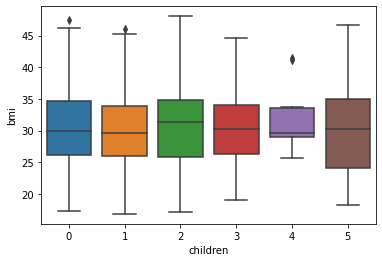

In [21]:
# now plotting the BMI vs # of children - using the new female_df, so that the male index values aren't counted
sns.boxplot(female_df['children'], female_df['bmi'])#, hue=female_df['smoker'])

<AxesSubplot:xlabel='children', ylabel='bmi'>

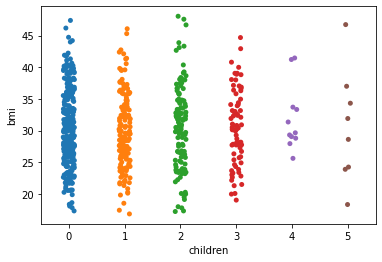

In [31]:
sns.stripplot(y = 'bmi', x='children', data=female_df, jitter=True)

In [30]:
female_df.head()

age     sex    bmi  children smoker     region      charges bmi_ranges  \
0   19  female  27.90         0    yes  southwest  16884.92400      26-30   
5   31  female  25.74         0     no  southeast   3756.62160      26-30   
6   46  female  33.44         1     no  southeast   8240.58960      31-35   
7   37  female  27.74         3     no  northwest   7281.50560      26-30   
9   60  female  25.84         0     no  northwest  28923.13692      26-30   

  age_ranges  
0      18-20  
5      31-35  
6        50+  
7      36-40  
9        NaN

In [39]:
# Checking the mean BMI for all females with zero children
female_df[female_df['children']==0]['bmi'].mean()

30.361522491349486

In [42]:
# Running a loop to check the mean BMI for women with 0, 1 and 2 children
mean_bmi = [] # creating a empty List
for ea in range(3): # for each in 0, 1  and 2
    temp = female_df[female_df['children']==ea]['bmi'].mean() # sort the female_df for number of children and calculate the mean for the corresponding BMI
    mean_bmi.append(temp) # add the mean BMI into the list
    
mean_bmi # print the list with mean BMI [0, 1 , 2]
# They come out to the same ~ 30 which answers Question # 5 
# Will also attempt to run the data through ANOVA 

[30.361522491349486, 30.05265822784811, 30.64978991596637]

In [44]:
female_bmi_anova = stats.f_oneway(female_df[female_df['children']==0]['bmi'], female_df[female_df['children']==1]['bmi'], female_df[female_df['children']==2]['bmi'])

In [45]:
female_bmi_anova

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)

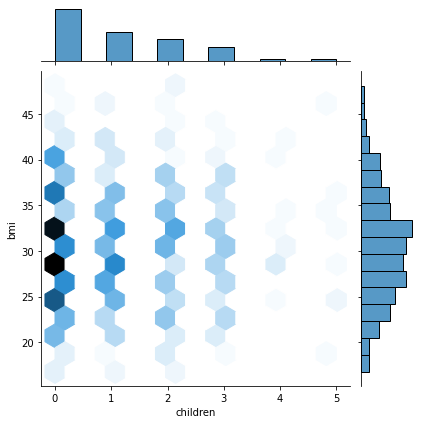

In [29]:
sns.jointplot(female_df['children'], female_df['bmi'], kind='hex')#, hue=female_df['smoker'])

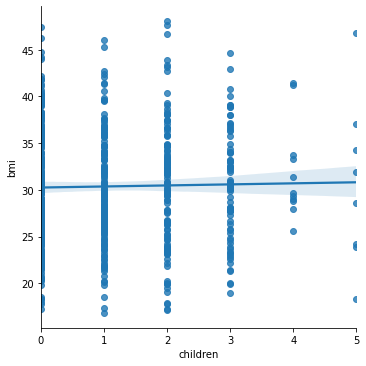

In [32]:
sns.lmplot(y='bmi',x='children', data=female_df)

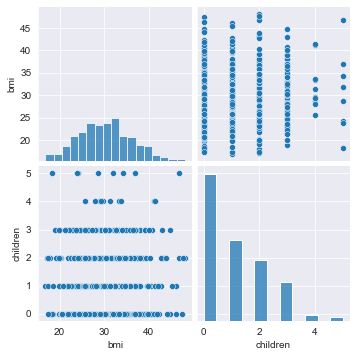

In [26]:
sns.pairplot(female_df[['bmi','children']]);

#  Running the data through Pandas Profiling Report 

In [24]:
import pandas_profiling

In [25]:
report = pandas_profiling.ProfileReport(axis)
report

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
report.to_file("pandas_profileREPORT.html") # Saves the report to an html format in my working folder

NameError: name 'report' is not defined

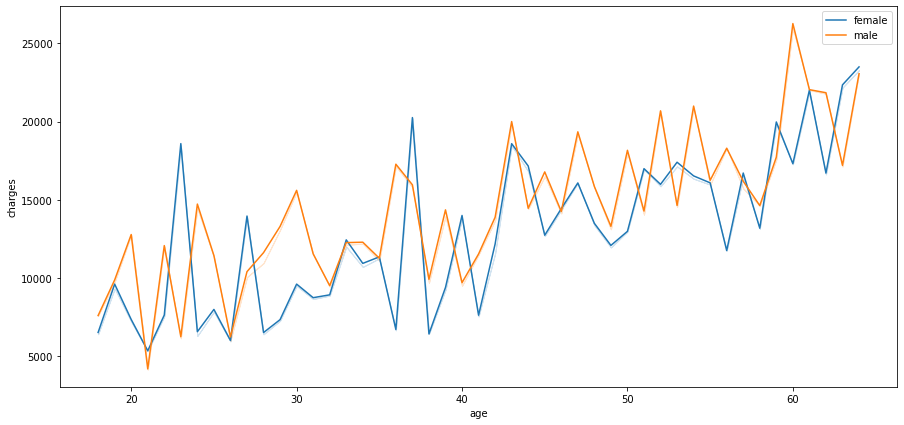

In [29]:
# Working on Customer Segmentation - and looking for differentiating factors 
plt.figure(figsize=(15,7))
sns.lineplot(axis["age"],axis["charges"],hue=axis["sex"],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

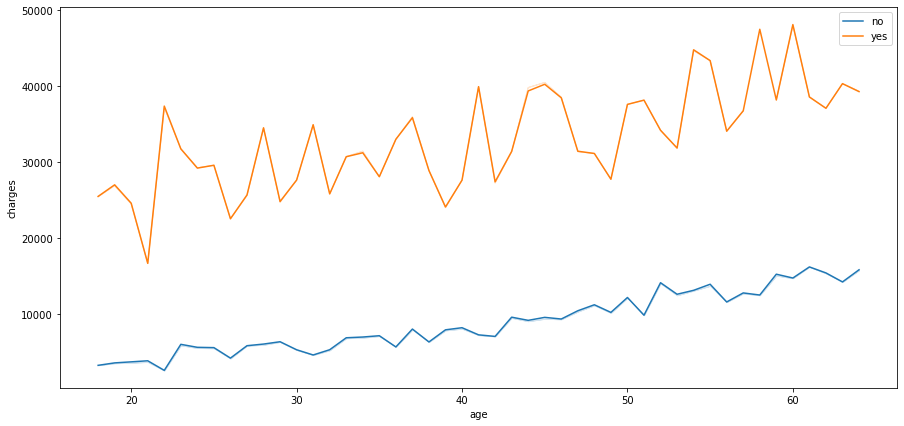

In [26]:
plt.figure(figsize=(15,7))
sns.lineplot(axis["age"],axis["charges"],hue=axis["smoker"],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

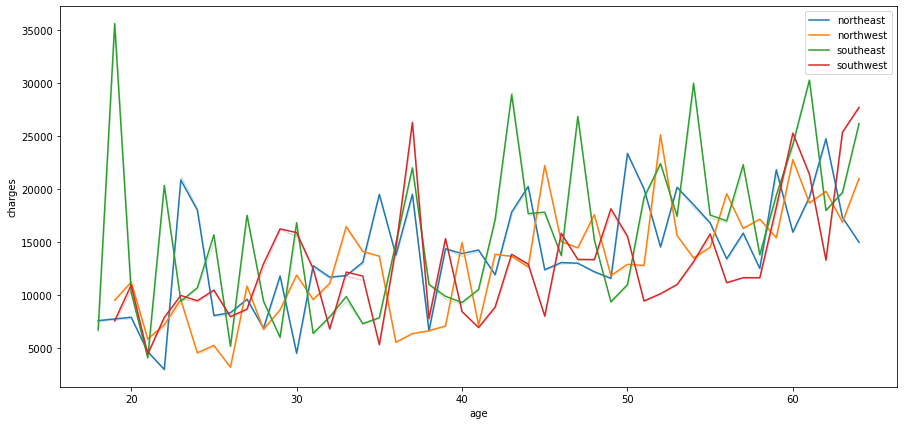

In [23]:
plt.figure(figsize=(15,7))
sns.lineplot(axis["age"],axis["charges"],hue=axis["region"],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

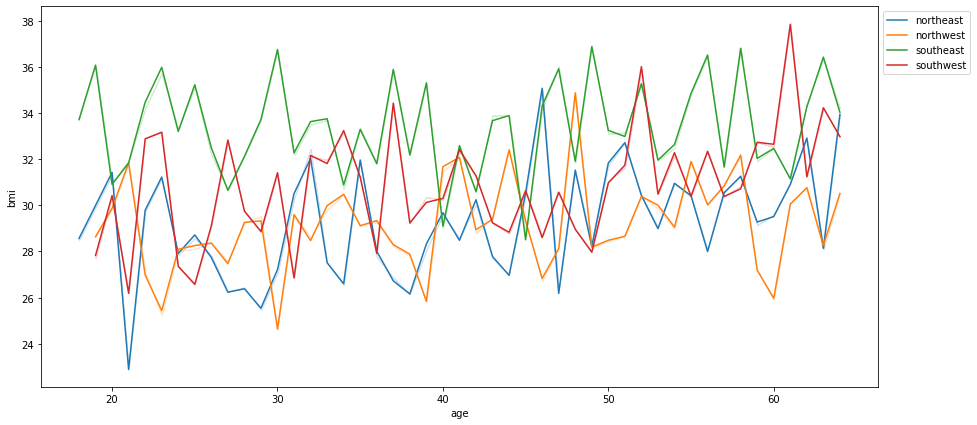

In [28]:
plt.figure(figsize=(15,7))
sns.lineplot(axis["age"],axis["bmi"],hue=axis["region"],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

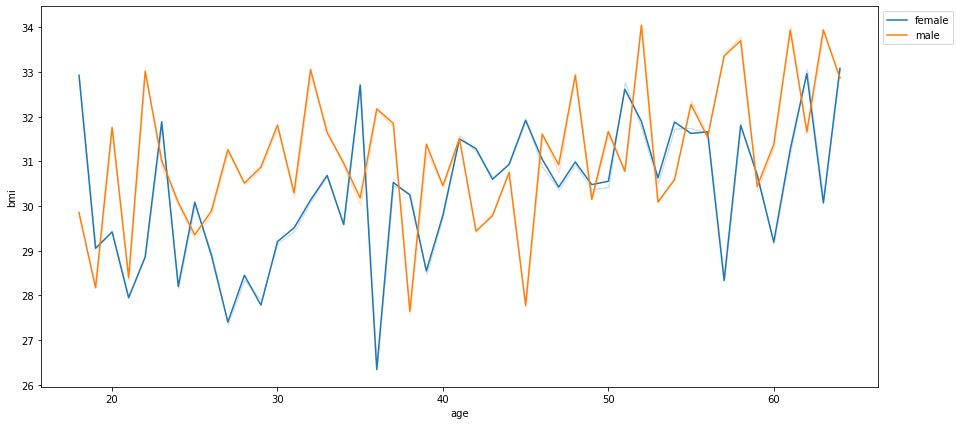

In [24]:
plt.figure(figsize=(15,7))
sns.lineplot(axis["age"],axis["bmi"],hue=axis["sex"],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

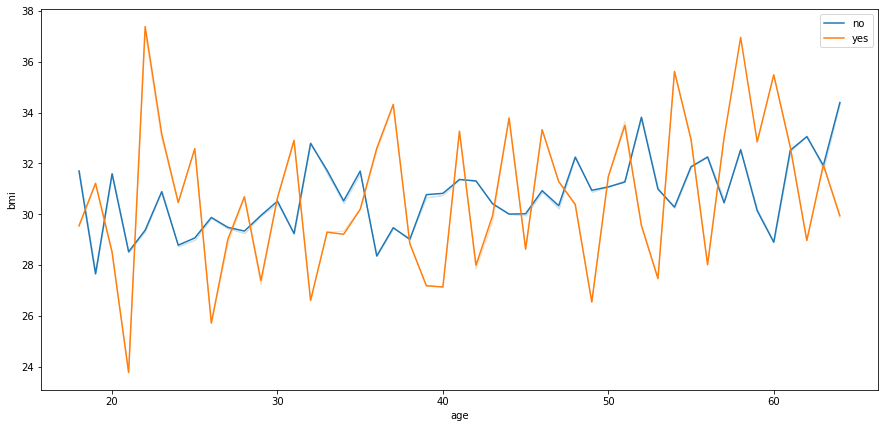

In [27]:
plt.figure(figsize=(15,7))
sns.lineplot(axis["age"],axis["bmi"],hue=axis["smoker"],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

No handles with labels found to put in legend.


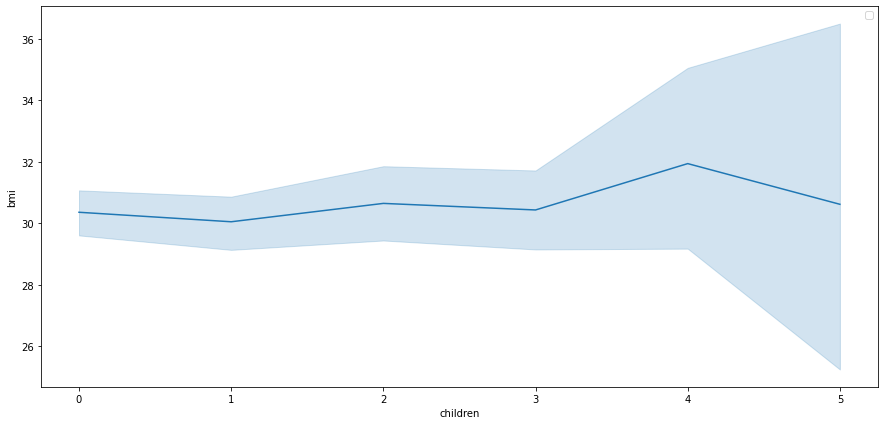

In [25]:
plt.figure(figsize=(15,7))
sns.lineplot(female_df["children"],female_df["bmi"])#,hue=female_df[""],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

In [17]:
# creating a new dataframe for smokers and one for non-smoker values
smoker_df = axis[axis['smoker']=='yes']
non_df = axis[axis['smoker']=='no']

In [18]:
smoker_df.head()

age     sex    bmi  children smoker     region     charges bmi_ranges  \
0    19  female  27.90         0    yes  southwest  16884.9240      26-30   
11   62  female  26.29         0    yes  southeast  27808.7251      26-30   
14   27    male  42.13         0    yes  southeast  39611.7577      41-45   
19   30    male  35.30         0    yes  southwest  36837.4670      36-40   
23   34  female  31.92         1    yes  northeast  37701.8768      31-35   

   age_ranges  
0       18-20  
11        NaN  
14      26-30  
19      26-30  
23      31-35

In [10]:
smoker_df.describe()
# getting the n, mean and std for smokers sample (to run a t-test on question 2)

age         bmi    children       charges
count  274.000000  274.000000  274.000000    274.000000
mean    38.514599   30.708449    1.113139  32050.231832
std     13.923186    6.318644    1.157066  11541.547176
min     18.000000   17.195000    0.000000  12829.455100
25%     27.000000   26.083750    0.000000  20826.244213
50%     38.000000   30.447500    1.000000  34456.348450
75%     49.000000   35.200000    2.000000  41019.207275
max     64.000000   52.580000    5.000000  63770.428010

In [38]:
smoker_df.shape
# 274 smokers total (will use later for chi contingency table)

(274, 9)

In [11]:
non_df.describe()
# getting the number of samples,n, mean and std for non-smokers sample (to run a t-test on question 2)

age          bmi     children       charges
count  1064.000000  1064.000000  1064.000000   1064.000000
mean     39.385338    30.651795     1.090226   8434.268298
std      14.083410     6.043111     1.218136   5993.781819
min      18.000000    15.960000     0.000000   1121.873900
25%      26.750000    26.315000     0.000000   3986.438700
50%      40.000000    30.352500     1.000000   7345.405300
75%      52.000000    34.430000     2.000000  11362.887050
max      64.000000    53.130000     5.000000  36910.608030

In [39]:
non_df.shape
# 1064 smokers total (will use later for chi contingency table)

(1064, 9)

In [31]:
# T-Test for Smoker and non-smoker Charges
# Note: using equal_var=False, the Method calculated 32.75 which matches the manual equation for t-value. 
# Running equal_var=True also delivers a very high t-value and very low p_value
# Therefore, showing the 32.75 in the PowerPoint to prevent confusion during the presentation
t_stat, p_value = stats.ttest_ind(smoker_df['charges'], non_df['charges'],  equal_var=False)

In [32]:
# Printing the t-value and p-values from above
print(t_stat,p_value)

32.751887766341824 5.88946444671698e-103


# Question 2 Notes: 
## From Above T-Test, the T-value is very high (>> 3) and the p-value is effectively Zero. Therefore we reject the Null Hypothesis. 
## Null Hypothesis: Non-Smoker Charges == Smoker Charges
## Alternative Hypothesis: Non-Smoker Charges < Smoker Charges

## Smoker Charges are Higher than Non-Smokers

In [20]:
# creating a dataframe with only males 
male_df = axis[axis['sex']=='male']

In [21]:
male_df.head()

age   sex     bmi  children smoker     region      charges bmi_ranges  \
1   18  male  33.770         1     no  southeast   1725.55230      31-35   
2   28  male  33.000         3     no  southeast   4449.46200      31-35   
3   33  male  22.705         0     no  northwest  21984.47061      21-25   
4   32  male  28.880         0     no  northwest   3866.85520      26-30   
8   37  male  29.830         2     no  northeast   6406.41070      26-30   

  age_ranges  
1      18-20  
2      26-30  
3      31-35  
4      31-35  
8      36-40

In [28]:
# getting the n, mean and std for male sample (to run a t-test on question 3)
male_df.describe()

age         bmi    children       charges
count  676.000000  676.000000  676.000000    676.000000
mean    38.917160   30.943129    1.115385  13956.751178
std     14.050141    6.140435    1.218986  12971.025915
min     18.000000   15.960000    0.000000   1121.873900
25%     26.000000   26.410000    0.000000   4619.134000
50%     39.000000   30.687500    1.000000   9369.615750
75%     51.000000   34.992500    2.000000  18989.590250
max     64.000000   53.130000    5.000000  62592.873090

In [29]:
# getting the n, mean and std for female sample (to run a t-test on question 3)
female_df.describe()

age         bmi    children       charges
count  662.000000  662.000000  662.000000    662.000000
mean    39.503021   30.377749    1.074018  12569.578844
std     14.054223    6.046023    1.192115  11128.703801
min     18.000000   16.815000    0.000000   1607.510100
25%     27.000000   26.125000    0.000000   4885.158700
50%     40.000000   30.107500    1.000000   9412.962500
75%     51.750000   34.313750    2.000000  14454.691825
max     64.000000   48.070000    5.000000  63770.428010

In [22]:
# T-Test for male/female BMI values
# Note: Calculating manually with the t-equation too, to doublecheck work 
t_stat_bmi, p_value_bmi = stats.ttest_ind(male_df['bmi'], female_df['bmi'],  equal_var=False)
print(t_stat_bmi, p_value_bmi)

1.697027933124022 0.08992430667834876


In [35]:
# Two Tail Hypothesis - therefore, multiply the p-value by 2 
two_tail_bmi_pvalue = p_value_bmi*2
print(two_tail_bmi_pvalue)

0.17984861335669752


In [36]:
axis.head()

age     sex     bmi  children smoker     region      charges bmi_ranges  \
0   19  female  27.900         0    yes  southwest  16884.92400      26-30   
1   18    male  33.770         1     no  southeast   1725.55230      31-35   
2   28    male  33.000         3     no  southeast   4449.46200      31-35   
3   33    male  22.705         0     no  northwest  21984.47061      21-25   
4   32    male  28.880         0     no  northwest   3866.85520      26-30   

  age_ranges  
0      18-20  
1      18-20  
2      26-30  
3      31-35  
4      31-35

In [48]:
# Checking the sum of smokers in each region
nwest = (axis[axis['region']=='northwest']['smoker']=='yes').sum()
print(nwest)

58


In [44]:
# Checking the sum of smokers in each region
neast = (axis[axis['region']=='northeast']['smoker']=='yes').sum()
print(neast)

67


In [45]:
# Checking the sum of smokers in each region
swest = (axis[axis['region']=='southwest']['smoker']=='yes').sum()
print(swest)

58


In [46]:
# Checking the sum of smokers in each region
seast = (axis[axis['region']=='southeast']['smoker']=='yes').sum()
print(seast)

91


In [49]:
# Checking the sum of non-smokers in each region
non_nwest = (axis[axis['region']=='northwest']['smoker']=='no').sum()
print(non_nwest)

267


In [50]:
# Checking the sum of non-smokers in each region
non_neast = (axis[axis['region']=='northeast']['smoker']=='no').sum()
print(non_neast)

257


In [51]:
# Checking the sum of non-smokers in each region
non_swest = (axis[axis['region']=='southwest']['smoker']=='no').sum()
print(non_swest)

267


In [52]:
# Checking the sum of non-smokers in each region
non_seast = (axis[axis['region']=='southeast']['smoker']=='no').sum()
print(non_seast)

273


In [25]:
# Taking the above values, I inputed them into a CSV and now am reading it with Pandas read_csv() method to create 
# the array for the method: stats.chi2_contingency()
smoker_region_table = pd.read_csv('smoker_regions.csv')

In [26]:
# Checking that the contingency table looks correct
# Index 0 is Number of Smokers & Index 1 is Non-Smokers
smoker_region_table

Northwest  Northeast  Southwest  Southeast
0         58         67         58         91
1        267        257        267        273

In [27]:
# Now imput the smoker_region_table, as a dataframe, into the chi2 method
smoker_by_region_chi = stats.chi2_contingency(smoker_region_table)

In [28]:
# printing the results from the chi2_contingency Method
smoker_by_region_chi
# returns (test stat, p-value, deg of freedom, array with expected frequencies)
# Will need to multiply p-value (0.0617) by two since it is a two tail

(7.34347776140707,
 0.06171954839170547,
 3,
 array([[ 66.55455904,  66.34977578,  66.55455904,  74.54110613],
        [258.44544096, 257.65022422, 258.44544096, 289.45889387]]))